In [1]:
from scipy.stats import norm
from math import sqrt

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font="serif", font_scale=1.1)

$$X_1, \ldots, X_n \sim B(m, p)$$

Напишем ЦПТ:
$$g(X_1, \ldots, X_n, p) = \frac {\bar{X} - mnp} {\sqrt{mnp(1-p)}} \sim N(0,1)$$

$$P(z_1 < g(X_1, \ldots, X_n, p) < z_2) = P\left(z_1 < \frac {\bar{X} - mnp} {\sqrt{mnp(1-p)}} < z_2\right)
= P\left(\frac {\bar{X}} {mn} - z_2 \sqrt{\frac {p(1-p)} {mn}} < p < \frac {\bar{X}} {mn} - z_1 \sqrt{\frac {p(1-p)} mn}\right) = 1 - \varepsilon$$

Подставим в левую и правую части неравенства вместо неизветного параметра $p$ асимптотически нормальную оценку $\hat{p} = \frac {\bar{X}} m$. $z_2 = - z_1 = \tau_{1 - \frac \varepsilon 2}$ - квартиль нормального распределения:

$$P\left(\frac {\bar{X}} {mn} - \tau_{1 - \frac \varepsilon 2} \sqrt{\frac {\hat{p}(1-\hat{p})} {mn}} < p < \frac {\bar{X}} {mn} + \tau_{1 - \frac \varepsilon 2} \sqrt{\frac {\hat{p}(1-\hat{p})} {mn}}\right) = 1 - \varepsilon$$

Итоговая длина интервала:
$$2 \tau_{1 - \frac \varepsilon 2} \sqrt{\frac {\hat{p}(1-\hat{p})} {mn}}$$


In [2]:
def interval_length(xs, n, m, eps=0.05):
    p_hat = xs.mean() / m
    return 2 * norm.ppf(1 - eps/2) * sqrt(p_hat * (1 - p_hat) / (m * n))

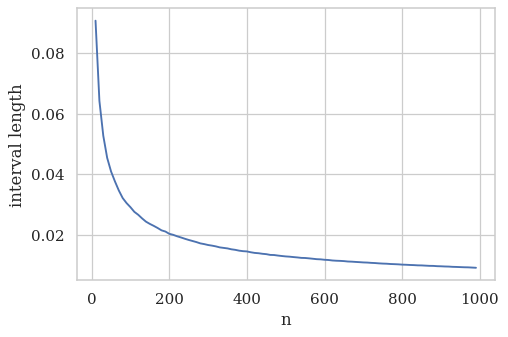

In [3]:
m = 42
p = 0.3

ns = list(range(10, 1000, 10))

ls = []
for n in ns:
    xs = np.random.binomial(50, p, n)
    ls.append(interval_length(xs, n, m))

plt.rcParams['figure.dpi'] = 90
plt.plot(ns, ls)
plt.xlabel('n')
plt.ylabel('interval length')
plt.show()

Смотря на итогую формулу для интервала, можно сделать вывод, что длина интервала убывает как $O(\frac 1 {\sqrt n})$. 
Проверим этот факт, подобрав константу.

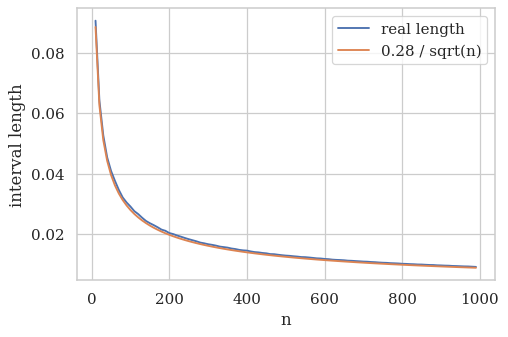

In [4]:
squares = [0.28/sqrt(n) for n in ns]

plt.rcParams['figure.dpi'] = 90
plt.plot(ns, ls, label='real length')
plt.plot(ns, squares, label='0.28 / sqrt(n)')
plt.xlabel('n')
plt.ylabel('interval length')
plt.legend()
plt.show()

Как мы видим, результаты для длины интервала выглядят практически идентично, что подверждает оценку $O(\frac 1 {\sqrt n})$ на скорость сходимости.